### 1. Importei as biblitoecas necessárias

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Carreguei o dataset

In [4]:
data = pd.read_csv('exams.csv')
data.head(10)
data.tail(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
990,female,group C,some high school,standard,none,70,77,76
991,female,group A,associate's degree,standard,none,72,77,77
992,male,group A,associate's degree,free/reduced,completed,75,67,67
993,male,group D,some high school,standard,none,83,74,80
994,female,group B,associate's degree,standard,none,82,97,90
995,male,group C,some college,standard,none,77,77,71
996,male,group C,some college,standard,none,80,66,66
997,female,group A,high school,standard,completed,67,86,86
998,male,group E,high school,standard,none,80,72,62
999,male,group D,high school,standard,none,58,47,45


### 3. Verifiquei o tamanho e o tipo de dados

In [5]:
tamanho = data.shape
print('O dataset possui {} linhas e {} colunas'.format(tamanho[0], tamanho[1]))

tipo = data.dtypes
print('O dataset possui {} colunas do tipo inteiro e {} colunas do tipo float'.format(tipo[tipo == 'int64'].count(), tipo[tipo == 'float64'].count()))

O dataset possui 1000 linhas e 8 colunas
O dataset possui 3 colunas do tipo inteiro e 0 colunas do tipo float


### 4. Verifiquei se existem valores nulos

In [6]:
nulos = data.isnull().sum()
print('O dataset possui {} valores nulos'.format(nulos.sum()))

O dataset possui 0 valores nulos


## 1. Manipulação de dado

### 1.1 Renomeei as colunas para PTBR e minúsculos sem espaço com o objetivo de facilitar a manipulação

In [14]:
colunas = ['gender', 'ethnics', 'parents_education', 'lunch_type', 'preparation_test', 'math_score', 'reading_score', 'writing_score']

data.columns = colunas

Index(['gender', 'ethnics', 'parents_education', 'lunch_type',
       'preparation_test', 'math_score', 'reading_score', 'writing_score'],
      dtype='object')

### 1.2 Verifiquei a existência de valores duplicados

In [16]:
duplicados = data.duplicated().sum()
print('O dataset possui {} valores duplicados'.format(duplicados))

O dataset possui 0 valores duplicados


### 1.3 Verifiquei os valores únicos de cada coluna e criei um dataframe com esses valores

In [19]:
unicos_gender = data['gender'].unique()
unicos_ethnics = data['ethnics'].unique()
unicos_parents_education = data['parents_education'].unique()
unicos_lunch_type = data['lunch_type'].unique()
unicos_preparation_test = data['preparation_test'].unique()
unicos_math_score = data['math_score'].unique()
unicos_reading_score = data['reading_score'].unique()
unicos_writing_score = data['writing_score'].unique()

print(f"A colúna gender possúi {len(unicos_gender)} valores núlos e eles são: {unicos_gender}")
print(f"A colúna ethnics possúi {len(unicos_ethnics)} valores núlos e eles são: {unicos_ethnics}")
print(f"A colúna parents_education possúi {len(unicos_parents_education)} valores núlos e eles são: {unicos_parents_education}")
print(f"A colúna lunch_type possúi {len(unicos_lunch_type)} valores núlos e eles são: {unicos_lunch_type}")
print(f"A colúna preparation_test possúi {len(unicos_preparation_test)} valores núlos e eles são: {unicos_preparation_test}")
print(f"A colúna math_score possúi {len(unicos_math_score)} valores núlos e eles são: {unicos_math_score}")
print(f"A colúna reading_score possúi {len(unicos_reading_score)} valores núlos e eles são: {unicos_reading_score}")
print(f"A colúna writing_score possúi {len(unicos_writing_score)} valores núlos e eles são: {unicos_writing_score}")

A colúna gender possúi 2 valores núlos e eles são: ['female' 'male']
A colúna ethnics possúi 5 valores núlos e eles são: ['group D' 'group B' 'group C' 'group E' 'group A']
A colúna parents_education possúi 6 valores núlos e eles são: ['some college' "associate's degree" 'some high school'
 "bachelor's degree" "master's degree" 'high school']
A colúna lunch_type possúi 2 valores núlos e eles são: ['standard' 'free/reduced']
A colúna preparation_test possúi 2 valores núlos e eles são: ['completed' 'none']
A colúna math_score possúi 79 valores núlos e eles são: [ 59  96  57  70  83  68  82  46  80  74  53  76  55  56  35  87  65  66
  67  89  99  58  90  69  32  86  52  63  62  79  71  61  75  73  64  23
  41  84  85  88  91  51 100  48  98  72  43  50  38  81  47  49  44  60
  93  77  20  78  94  39  42  54  37  45  27  92  95  34  97  31  40  33
  21  25  28  15  24  30  36]
A colúna reading_score possúi 71 valores núlos e eles são: [ 70  93  76  85  57  83  61  75  69  50  74  73  54 

### 1.4 Criei uma nova coluna com a média total dos alunos

In [20]:
data['final_score'] = (data['math_score'] + data['reading_score'] + data['writing_score']) / 3
data.head(10)

,gender,ethnics,parents_education,lunch_type,preparation_test,math_score,reading_score,writing_score,final_score
0,female,group D,some college,standard,completed,59,70,78,69.000000
1,male,group D,associate's degree,standard,none,96,93,87,92.000000
2,female,group D,some college,free/reduced,none,57,76,77,70.000000
3,male,group B,some college,free/reduced,none,70,70,63,67.666667
4,female,group D,associate's degree,standard,none,83,85,86,84.666667
5,male,group C,some high school,standard,none,68,57,54,59.666667
6,female,group E,associate's degree,standard,none,82,83,80,81.666667
7,female,group B,some high school,standard,none,46,61,58,55.000000
8,male,group C,some high school,standard,none,80,75,73,76.000000
9,female,group C,bachelor's degree,standard,completed,57,69,77,67.666667


### 1.5 Criei uma nova coluna com a situação do aluno

In [21]:
data['status'] = np.where(data['final_score'] >= 60, 'passed', 'failed')
data.head(10)

,gender,ethnics,parents_education,lunch_type,preparation_test,math_score,reading_score,writing_score,final_score,status
0,female,group D,some college,standard,completed,59,70,78,69.000000,passed
1,male,group D,associate's degree,standard,none,96,93,87,92.000000,passed
2,female,group D,some college,free/reduced,none,57,76,77,70.000000,passed
3,male,group B,some college,free/reduced,none,70,70,63,67.666667,passed
4,female,group D,associate's degree,standard,none,83,85,86,84.666667,passed
5,male,group C,some high school,standard,none,68,57,54,59.666667,failed
6,female,group E,associate's degree,standard,none,82,83,80,81.666667,passed
7,female,group B,some high school,standard,none,46,61,58,55.000000,failed
8,male,group C,some high school,standard,none,80,75,73,76.000000,passed
9,female,group C,bachelor's degree,standard,completed,57,69,77,67.666667,passed


### Criei um dataframe com as variáveis numéricas, transformando as categóricas em numéricas

In [24]:
data_num = data.copy()
data_num.head(10)

,gender,ethnics,parents_education,lunch_type,preparation_test,math_score,reading_score,writing_score,final_score,status
0,female,group D,some college,standard,completed,59,70,78,69.000000,passed
1,male,group D,associate's degree,standard,none,96,93,87,92.000000,passed
2,female,group D,some college,free/reduced,none,57,76,77,70.000000,passed
3,male,group B,some college,free/reduced,none,70,70,63,67.666667,passed
4,female,group D,associate's degree,standard,none,83,85,86,84.666667,passed
5,male,group C,some high school,standard,none,68,57,54,59.666667,failed
6,female,group E,associate's degree,standard,none,82,83,80,81.666667,passed
7,female,group B,some high school,standard,none,46,61,58,55.000000,failed
8,male,group C,some high school,standard,none,80,75,73,76.000000,passed
9,female,group C,bachelor's degree,standard,completed,57,69,77,67.666667,passed


### 1.6 Dropei as colunas que não serão utilizadas

In [32]:
data_num.drop(columns = ['lunch_type', 'ethnics'], inplace=True)
data_num.head(10)

,gender,parents_education,preparation_test,math_score,reading_score,writing_score,final_score,status
0,female,some college,completed,59,70,78,69.000000,passed
1,male,associate's degree,none,96,93,87,92.000000,passed
2,female,some college,none,57,76,77,70.000000,passed
3,male,some college,none,70,70,63,67.666667,passed
4,female,associate's degree,none,83,85,86,84.666667,passed
5,male,some high school,none,68,57,54,59.666667,failed
6,female,associate's degree,none,82,83,80,81.666667,passed
7,female,some high school,none,46,61,58,55.000000,failed
8,male,some high school,none,80,75,73,76.000000,passed
9,female,bachelor's degree,completed,57,69,77,67.666667,passed


### 1.7 Transformei os valores relacionados à variável 'gender' em numéricas

In [35]:
data_num['gender'] = data_num['gender'].replace({'male': 0, 'female': 1})
data_num.head(10)

,gender,parents_education,preparation_test,math_score,reading_score,writing_score,final_score,status
0,1,some college,completed,59,70,78,69.000000,passed
1,0,associate's degree,none,96,93,87,92.000000,passed
2,1,some college,none,57,76,77,70.000000,passed
3,0,some college,none,70,70,63,67.666667,passed
4,1,associate's degree,none,83,85,86,84.666667,passed
5,0,some high school,none,68,57,54,59.666667,failed
6,1,associate's degree,none,82,83,80,81.666667,passed
7,1,some high school,none,46,61,58,55.000000,failed
8,0,some high school,none,80,75,73,76.000000,passed
9,1,bachelor's degree,completed,57,69,77,67.666667,passed


**Substituição dos valores 'gender'**
1. male = 0
2. female = 1#

### 1.8 Transformei os valores relacionados à variável 'parents_education' em numéricas (score de 1-5 sendo 1 o menor e 5 o maior nível de educação)

In [36]:
data_num['parents_education'] = data_num['parents_education'].replace({'some high school': 0, 'high school': 1, 'some college': 2, "associate's degree": 3, "bachelor's degree": 4, "master's degree": 5})
data_num.head(10)

,gender,parents_education,preparation_test,math_score,reading_score,writing_score,final_score,status
0,1,2,completed,59,70,78,69.000000,passed
1,0,3,none,96,93,87,92.000000,passed
2,1,2,none,57,76,77,70.000000,passed
3,0,2,none,70,70,63,67.666667,passed
4,1,3,none,83,85,86,84.666667,passed
5,0,0,none,68,57,54,59.666667,failed
6,1,3,none,82,83,80,81.666667,passed
7,1,0,none,46,61,58,55.000000,failed
8,0,0,none,80,75,73,76.000000,passed
9,1,4,completed,57,69,77,67.666667,passed


### 1.9 Transformei os valores relacionados à variável 'preparation_test' em numéricas

In [45]:
data_num['preparation_test'] = data_num['preparation_test'].replace({'none': 0, 'completed': 1})
data_num.head(10)

,gender,parents_education,preparation_test,math_score,reading_score,writing_score,final_score,status
0,1,2,1,59,70,78,69.000000,passed
1,0,3,0,96,93,87,92.000000,passed
2,1,2,0,57,76,77,70.000000,passed
3,0,2,0,70,70,63,67.666667,passed
4,1,3,0,83,85,86,84.666667,passed
5,0,0,0,68,57,54,59.666667,failed
6,1,3,0,82,83,80,81.666667,passed
7,1,0,0,46,61,58,55.000000,failed
8,0,0,0,80,75,73,76.000000,passed
9,1,4,1,57,69,77,67.666667,passed


**Substituição dos valores 'preparation_test'**
1. none = 0
2. completed = 1

## 2. Análise Exploratória de Dados

### 2.1 Verifiquei a distribuição das variáveis numéricas utilizando 'status' como referência.

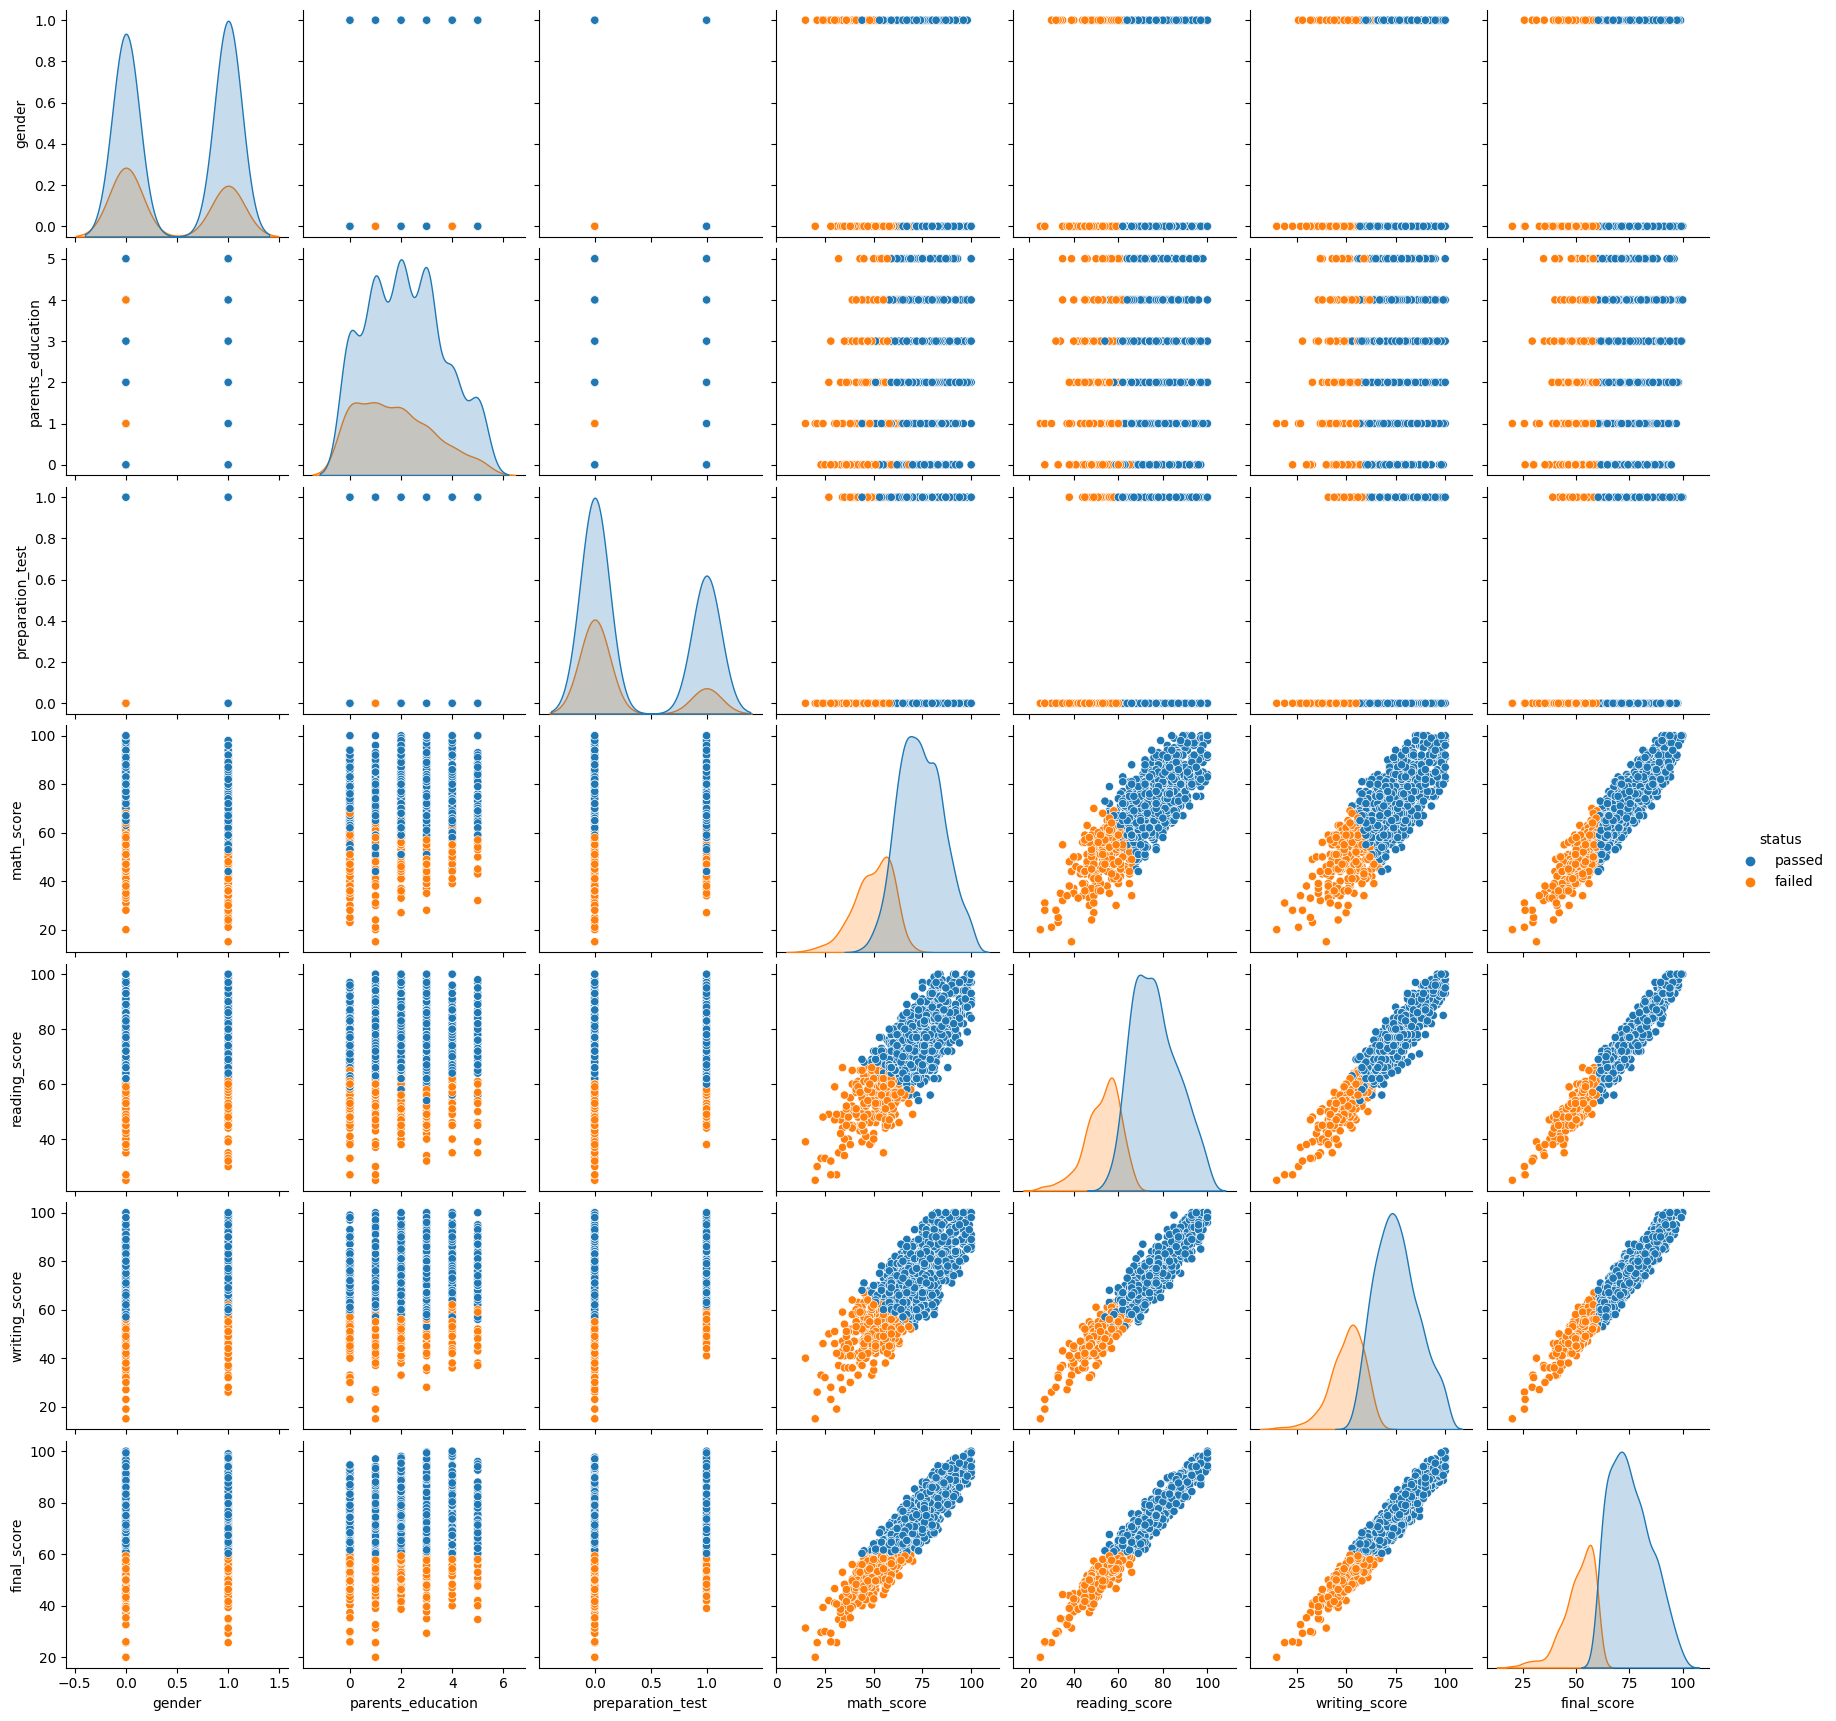

In [46]:
sns.pairplot(data_num, hue='status')

### 2.2 Verifiquei a correlação entre as variáveis numéricas utilizando heatmap.

/tmp/ipykernel_2875/1778234929.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data_num.corr()


<AxesSubplot: >

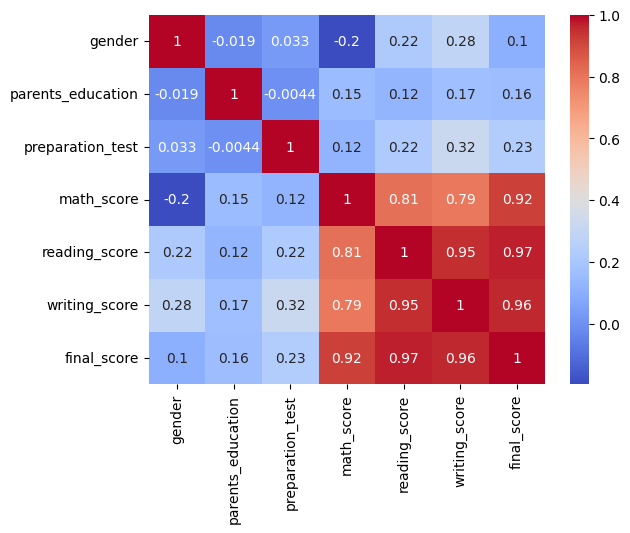

In [47]:
corr = data_num.corr()
sns.heatmap(corr, cmap='coolwarm' ,annot=True)

**Conclusão**
1. Variáveis com maior correlação com 'final_score' são 'math_score', 'reading_score' e 'writin_score'. Essas variáveis parecem ser de suma importância para fazer a previsão da nota final e do status do aluno.

## 3. Dataset para Modelagem Machine Learning

In [50]:
data_model = data_num.copy()
data_model.drop(columns = ['gender', 'parents_education', 'preparation_test', 'status'], inplace=True)
data_model.head(10)

,math_score,reading_score,writing_score,final_score
0,59,70,78,69.000000
1,96,93,87,92.000000
2,57,76,77,70.000000
3,70,70,63,67.666667
4,83,85,86,84.666667
5,68,57,54,59.666667
6,82,83,80,81.666667
7,46,61,58,55.000000
8,80,75,73,76.000000
9,57,69,77,67.666667


### 3.1 Exportei o dataset para csv

In [53]:
data_model.to_csv('data_model.csv', index=False)